# Step 0 - Prepare Depth Map #

There should be 2 ways to create the depth data and prepare for point generation:

1. From the capture app - accurate metric depth is generated from the Lidar sensor. These data are sent over from the app, no need for step 0.

2. From image-to-depth model - estimate the depth for plain images. See below.



## depth_anything_v2 ##

We use depth_anything_v2. Download the indoor and outdoor models [here](https://github.com/DepthAnything/Depth-Anything-V2/tree/main/metric_depth#pre-trained-models).

Place the models in `depth_anything_v2/checkpoints`. I'm using the small models.

In [1]:
# Probably need pillow-heif for iphone photos
!pip install pillow pillow-heif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.7 MB/s  0:00:01 eta 0:00:01


In [6]:
import os
import sys
from pathlib import Path
import cv2

from pipeline.metric_depth import estimate_depth_metric
from pipeline.prepare_data import vignette_data_from_image_and_depth, load_image_rgb_any

In [8]:
# Set up paths
VIGNETTE_NAME = "capture4"

project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

VIGNETTE_PATH = project_root / "test_data" / VIGNETTE_NAME
rgb_path = VIGNETTE_PATH / "rgb.HEIC" # This could be heic

In [9]:
# Run depth_anything_v2
rgb = load_image_rgb_any(rgb_path)
depth_m = estimate_depth_metric(
    rgb,  # pass RGB
    scene='indoor',        # 'indoor' or 'outdoor'
    encoder='vits',        # 'vits'|'vitb'|'vitl' (must match checkpoint)
    input_size=518,        # optional
    checkpoints_dir='depth_anything_v2/checkpoints',
)

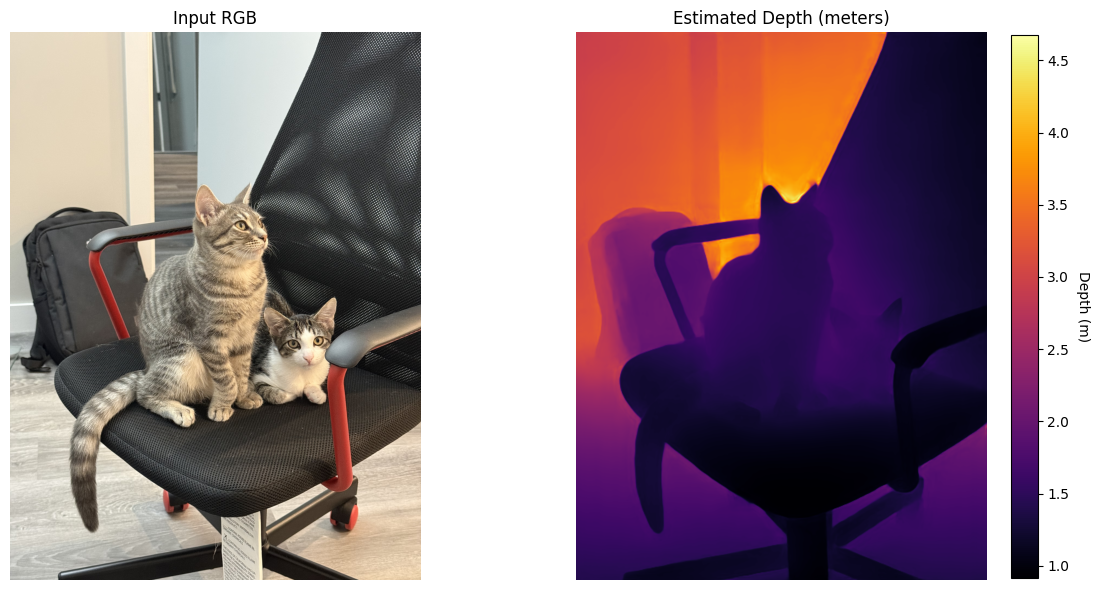

Depth range: 0.92 m → 4.68 m


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# RGB image
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.title("Input RGB")
plt.axis("off")

# Depth map in meters (true scale)
plt.subplot(1, 2, 2)
im = plt.imshow(depth_m, cmap="inferno")  # or 'plasma', 'turbo'
plt.title("Estimated Depth (meters)")
plt.axis("off")

# Add colorbar showing depth range
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Depth (m)", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Optional: print numeric range for clarity
print(f"Depth range: {depth_m.min():.2f} m → {depth_m.max():.2f} m")

In [11]:
# Save data
vignette_data_from_image_and_depth(
    img_path=rgb_path,
    depth_m=depth_m,
    out_dir=VIGNETTE_PATH,
    intrinsics_K=None,         # or provide a 3x3 K if you have calibrated intrinsics
    subject_uv=(0.5, 0.5),     # center tap, placeholder
    confidence=None,           # or a same-sized confidence map
    default_hfov_deg=60.0,     # fallback if EXIF has no focal info
)

- RGB image saved to /Users/yuzhenzhang/Documents/Research/TestApp/SpatialVignetteServer/test_data/capture4/rgb.png
- Depth image size 3024 x 4032
- Depth map saved to /Users/yuzhenzhang/Documents/Research/TestApp/SpatialVignetteServer/test_data/capture4/depth.bin
- Metadata saved to /Users/yuzhenzhang/Documents/Research/TestApp/SpatialVignetteServer/test_data/capture4/metadata.json
- Done
